In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
wood_df = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel_df = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
rlc_df = pd.read_csv('roller_coasters.csv')

In [4]:
steel_df.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


In [5]:
#x = wood_df[wood_df.Name == 'El Toro']['Year Built'].values
#y = wood_df[wood_df.Name == 'El Toro'].Rank.values
#z = sorted(list(zip(x, y)))
#a,b = [list(c) for c in zip(*z)]

#plt.plot(a, b)

In [6]:
def finding_eltoro(rcname, parkname, df):
    df = df[(df.Name == rcname) & (df.Park == parkname)].sort_values(by=['Year Built'])
    x = df['Year Built'].values
    y = df.Rank.values
    ax = plt.subplot()
    plt.plot(x, y, marker='o')
    plt.xlabel("Year Built")
    plt.ylabel("Ranking Points")
    plt.title("Ranking points by year of a roller coaster")

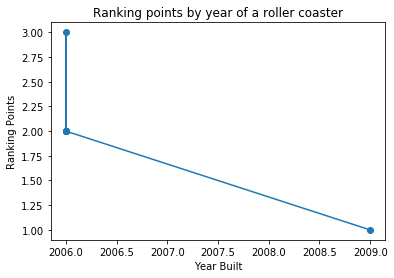

In [7]:
finding_eltoro('El Toro', 'Six Flags Great Adventure', wood_df)

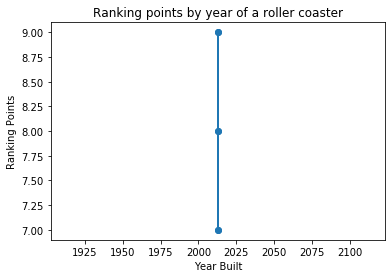

In [8]:
finding_eltoro('Outlaw Run', 'Silver Dollar City', wood_df)

In [9]:
def ploting_twocoasters(fcoaster, scoaster, park_name_1, park_name_2, df):
    df1 = df[(df.Name == fcoaster) & (df.Park == park_name_1)].sort_values(by=['Year Built'])
    df2 = df[(df.Name == scoaster) & (df.Park == park_name_2)].sort_values(by=['Year Built'])
    
    x1 = df1['Year Built'].values
    y1 = df1.Rank.values

    x2 = df2['Year Built'].values
    y2 = df2.Rank.values

    ax = plt.subplot()
    plt.plot(x1, y1, marker='o')
    plt.plot(x2, y2, marker='o')
    plt.xlabel("Year Built")
    plt.ylabel("Ranking Points")
    plt.legend([fcoaster, scoaster])
    plt.title("Ranking points by year of a roller coaster")

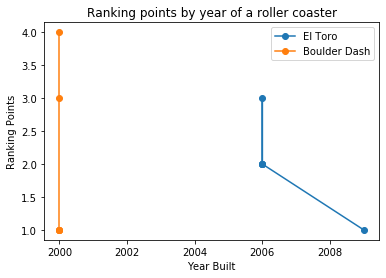

In [10]:
ploting_twocoasters('El Toro', 'Boulder Dash', 'Six Flags Great Adventure', 'Lake Compounce', wood_df)

In [11]:
def top_n_rollercoaster(n, rankings_df):

    top_n_rankings = rankings_df[rankings_df['Rank'] <= n]
    ax = plt.subplot()
        
    for coaster in set(top_n_rankings['Name']):
        coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
        ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster)  

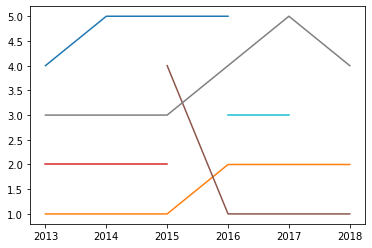

In [12]:
top_n_rollercoaster(5, steel_df)

In [13]:
rlc_df.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [14]:
def make_it_histogram(df, column_name):
    values = df[column_name].dropna().values
    plt.hist(values)
    plt.xlabel('Speed')
    plt.ylabel('Frequency')
    plt.show()

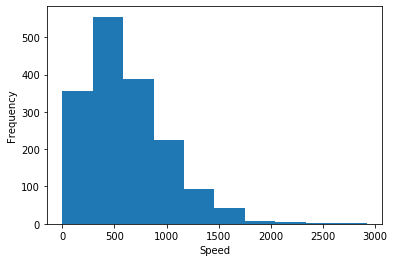

In [15]:
make_it_histogram(rlc_df, 'length')

In [16]:
def plot_numinv(df, parkname):
    df = df[df.park == parkname]
    df = df.sort_values('num_inversions', ascending=False)
    coaster_names =  df['name']
    number_inversions =  df['num_inversions']
    plt.bar(coaster_names, number_inversions)
    plt.subplots_adjust(left=1, right=4)
    plt.xlabel('Roller Coaster Name')
    plt.ylabel('Number of inversions')
    plt.title('Bar chart num inv in an amusement park')
    plt.show()

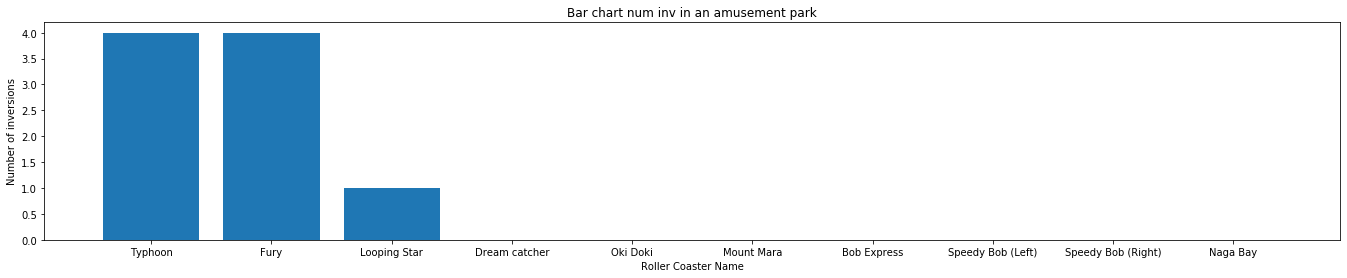

In [17]:
plot_numinv(rlc_df, 'Bobbejaanland')

In [18]:
def closer_or_open(df):
    freq_operating = df.status.value_counts()[:2][0]
    freq_closed = df.status.value_counts()[:2][1]

    freqs = [freq_operating, freq_closed]
    freqs_names = ['Operating', 'Closed Definitely']

    plt.pie(freqs, autopct = '%0.1f%%')
    plt.axis('equal')
    plt.legend(freqs_names)

    plt.show()

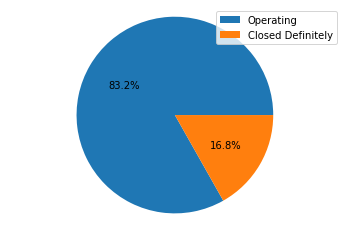

In [19]:
closer_or_open(rlc_df)

In [20]:
def scatter_nums(df, col1, col2):
    df_col1 = df[col1]
    df_col2 = df[col2]

    plt.scatter(df_col1, df_col2)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(col2 + ' vs. ' + col1)
    plt.show()

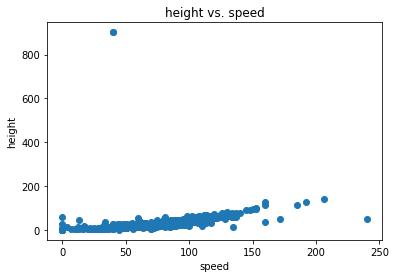

In [21]:
scatter_nums(rlc_df, 'speed', 'height')

In [22]:
x = rlc_df['seating_type']

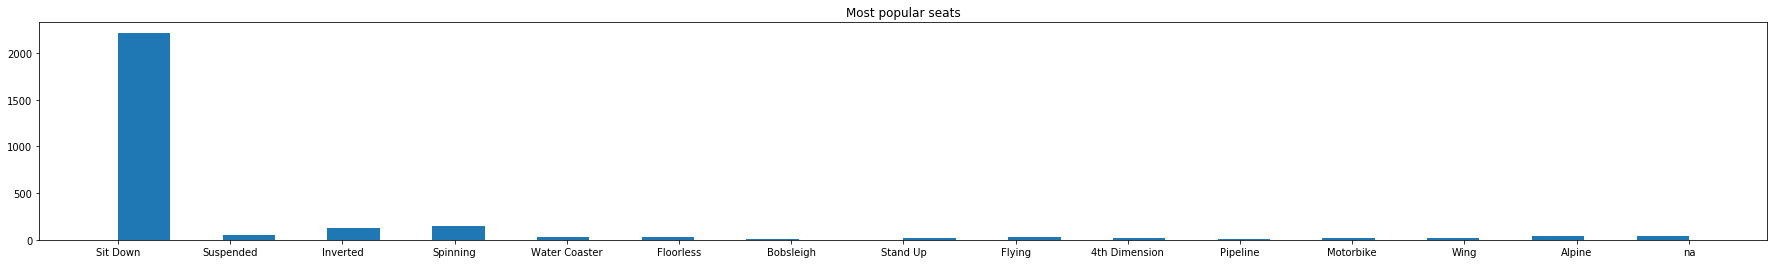

In [23]:
plt.hist(x, bins=30)
plt.subplots_adjust(left=1, right=5)
plt.title('Most popular seats')
plt.show()

In [24]:
def cols_analyses_seatingtype(colsname, df):
    x = df.groupby('seating_type')[colsname].sum().index
    y = df.groupby('seating_type')[colsname].sum().values

    plt.bar(x, y)
    plt.subplots_adjust(left = 1, right=5)
    plt.title(colsname + ' vs. ' + 'Sum')
    plt.xlabel(colsname)
    plt.ylabel('Sum of ' + colsname)

    plt.show()


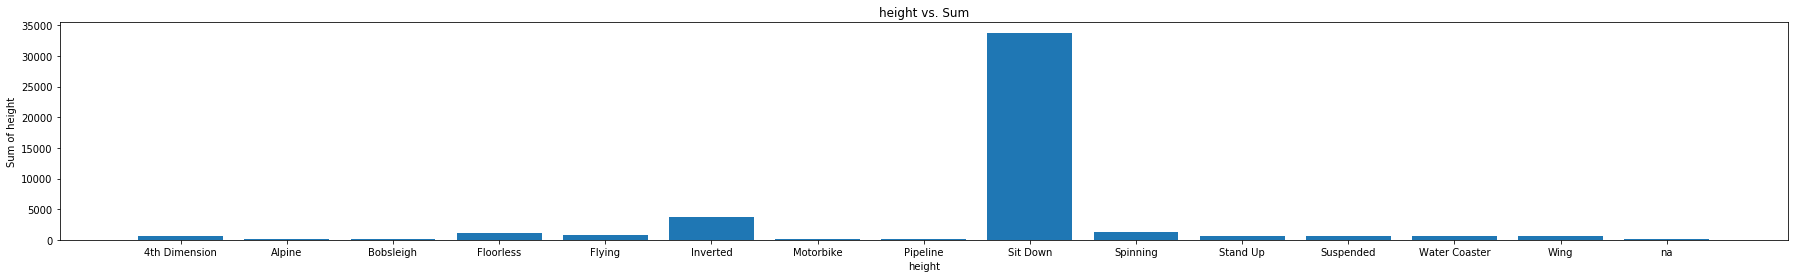

In [25]:
cols_analyses_seatingtype('height', rlc_df)

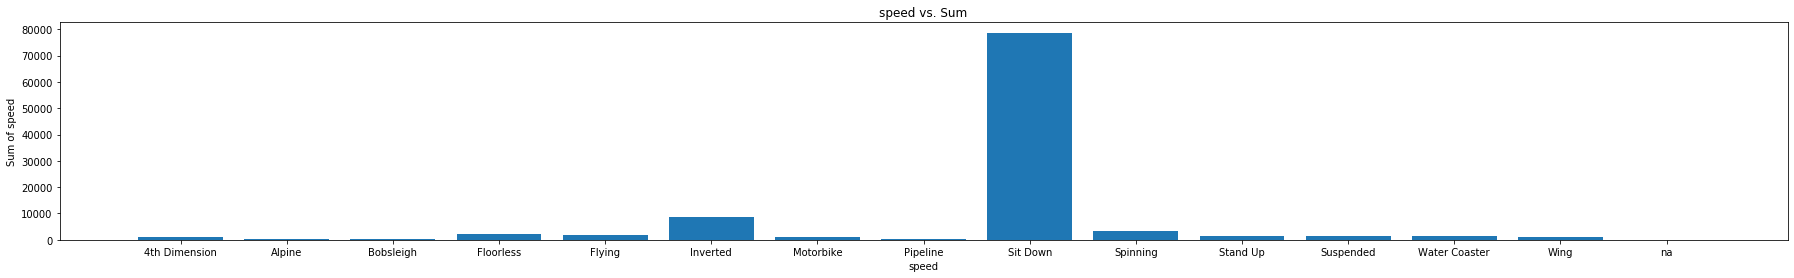

In [26]:
cols_analyses_seatingtype('speed', rlc_df)

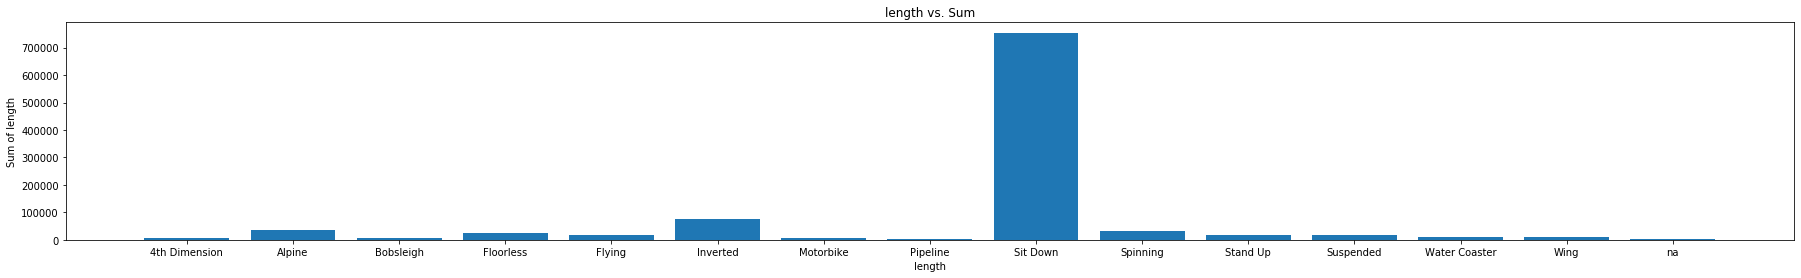

In [27]:
cols_analyses_seatingtype('length', rlc_df)

In [28]:
rlc_df

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating
...,...,...,...,...,...,...,...,...,...,...
2797,Dragon Challenge,Steel,Sit Down,NaN,NaN,NaN,0.0,Pinfari,Barry Island Pleasure Park,status.operating
2798,Wild Mouse,Steel,Spinning,NaN,NaN,NaN,0.0,Reverchon,Barry Island Pleasure Park,status.operating
2799,Unnamed Atlantica Supersplash Clone,Steel,Sit Down,80.0,30.0,390.0,0.0,Mack,Le Pal,status.announced
2800,Unknown Duelling Launch Coaster,Steel,na,NaN,NaN,NaN,0.0,na,Universal's Epic Universe,status.rumored


In [44]:
len(rlc_df.groupby('manufacturer').speed.mean().dropna().values)

quarter_len + quarter_len +quarter_len +quarter_len

84

In [48]:
quarter_len * 4

84

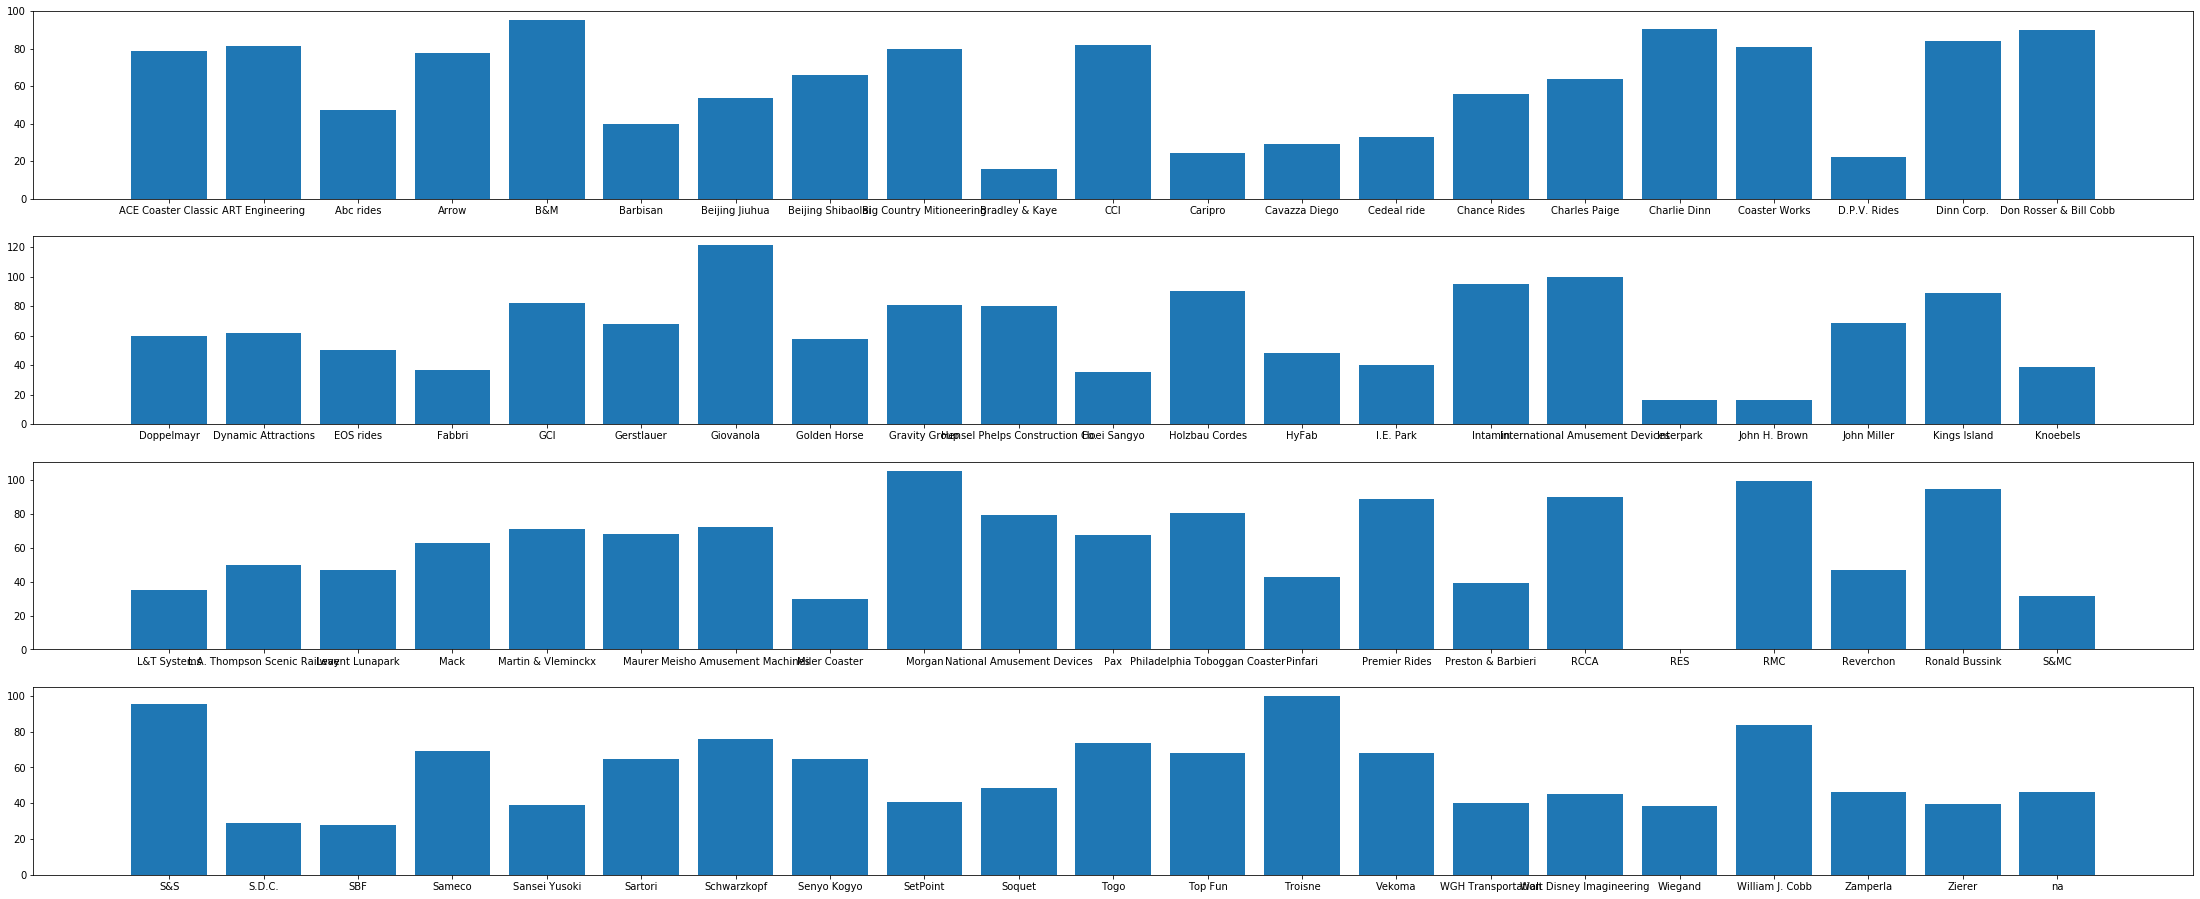

In [57]:
quarter_len = int(len(rlc_df.groupby('manufacturer').speed.mean().dropna().values) / 4)

y_1 = rlc_df.groupby('manufacturer').speed.mean().dropna().values[:quarter_len]
x_1 = rlc_df.groupby('manufacturer').speed.mean().dropna().index[:quarter_len]

y_2 = rlc_df.groupby('manufacturer').speed.mean().dropna().values[quarter_len:quarter_len*2]
x_2 = rlc_df.groupby('manufacturer').speed.mean().dropna().index[quarter_len:quarter_len*2]

y_3 = rlc_df.groupby('manufacturer').speed.mean().dropna().values[quarter_len*2:quarter_len*3]
x_3 = rlc_df.groupby('manufacturer').speed.mean().dropna().index[quarter_len*2:quarter_len*3]

y_4 = rlc_df.groupby('manufacturer').speed.mean().dropna().values[quarter_len*3:quarter_len*4]
x_4 = rlc_df.groupby('manufacturer').speed.mean().dropna().index[quarter_len*3:quarter_len*4]


plt.subplot(4, 1, 1)
plt.bar(x_1, y_1)

plt.subplot(4, 1, 2)
plt.bar(x_2, y_2)

plt.subplot(4, 1, 3)
plt.bar(x_3, y_3)

plt.subplot(4, 1, 4)
plt.bar(x_4, y_4)

plt.subplots_adjust(left=1, right=6, bottom=2, top=5)

plt.show()